# Obtaining and Exploring a Real-World Corpus

In industry, you almost never start with a perfectly curated list of documents.
You start by:

- locating an existing corpus

- understanding its scope and structure

- checking what it contains and what it does not

- inspecting it before deciding how to preprocess it

https://stateoftheunion.onetwothree.net/

https://www.kaggle.com/datasets/nltkdata/state-union-corpus

## Loading a Real Corpus (State of the Union)

NLTK includes a built-in corpus of all U.S. State of the Union addresses spanning more than two centuries.

In [15]:
# Import libraries
import nltk
from nltk.corpus import state_union
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [4]:

# Download the state_union corpus
nltk.download('state_union')


[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.


True

In [5]:
state_union.fileids()[:10]  # List the file IDs in the corpus

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt']

- Each file corresponds to one speech, typically named by year and president.
- Each file is a document.
- The full collection is a corpus.



## Understanding Corpus Scope

In [7]:
# How large is this corpus?
num_documents = len(state_union.fileids())
num_words = len(state_union.words())
print(f"Number of documents: {num_documents}"
      f"\nNumber of words: {num_words}")

Number of documents: 65
Number of words: 399822


In [10]:
# Inspect the time span
state_union.fileids()[:5], state_union.fileids()[-5:]


(['1945-Truman.txt',
  '1946-Truman.txt',
  '1947-Truman.txt',
  '1948-Truman.txt',
  '1949-Truman.txt'],
 ['2002-GWBush.txt',
  '2003-GWBush.txt',
  '2004-GWBush.txt',
  '2005-GWBush.txt',
  '2006-GWBush.txt'])

- This corpus spans over 200 years of political language.
- This makes it suitable for temporal, historical, and policy trend analysis.

# Inspecting Raw Text (No Processing Yet)
Before tokenization, normalization, or cleaning, we inspect the raw text.

In [24]:
# View raw text from a specific document
sample_file = state_union.fileids()[0]
raw_text = state_union.raw(sample_file)
print(sample_file)  # e.g., the first 1000 characters
raw_text[:1000]  # e.g., the 11th document

1945-Truman.txt


"PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS\n \nApril 16, 1945\n\nMr. Speaker, Mr. President, Members of the Congress:\nIt is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.\nOnly yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt. At a time like this, words are inadequate. The most eloquent tribute would be a reverent silence.\nYet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.\nIn His infinite wisdom, Almighty God has seen fit to take from us a great man who loved, and was beloved by, all humanity.\nNo man could possibly fill the tremendous void left by the passing of that noble soul. No words can ease the aching hearts of untold millions of every race, creed and color. The world knows it has lost a heroic champion of justice and freedom.\nTragic fate has 

- Is this clean or messy text?

- Do you see formatting artifacts?

- Would you need domain-specific cleaning?

In [8]:
# Inspect the first 500 words of the 1945 Truman address
truman_1945_words = state_union.words('1945-Truman.txt')[:500]
#truman_1945_text = ' '.join(truman_1945_words)  # Join words into a single string

In [9]:
truman_1945_words

['PRESIDENT',
 'HARRY',
 'S',
 '.',
 'TRUMAN',
 "'",
 'S',
 'ADDRESS',
 'BEFORE',
 'A',
 'JOINT',
 'SESSION',
 'OF',
 'THE',
 'CONGRESS',
 'April',
 '16',
 ',',
 '1945',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'President',
 ',',
 'Members',
 'of',
 'the',
 'Congress',
 ':',
 'It',
 'is',
 'with',
 'a',
 'heavy',
 'heart',
 'that',
 'I',
 'stand',
 'before',
 'you',
 ',',
 'my',
 'friends',
 'and',
 'colleagues',
 ',',
 'in',
 'the',
 'Congress',
 'of',
 'the',
 'United',
 'States',
 '.',
 'Only',
 'yesterday',
 ',',
 'we',
 'laid',
 'to',
 'rest',
 'the',
 'mortal',
 'remains',
 'of',
 'our',
 'beloved',
 'President',
 ',',
 'Franklin',
 'Delano',
 'Roosevelt',
 '.',
 'At',
 'a',
 'time',
 'like',
 'this',
 ',',
 'words',
 'are',
 'inadequate',
 '.',
 'The',
 'most',
 'eloquent',
 'tribute',
 'would',
 'be',
 'a',
 'reverent',
 'silence',
 '.',
 'Yet',
 ',',
 'in',
 'this',
 'decisive',
 'hour',
 ',',
 'when',
 'world',
 'events',
 'are',
 'moving',
 'so',
 'rapidly',
 ',',
 'our'

# Words vs Sentences vs Characters?
At this stage, we only explore structure.

In [25]:
# Basic statistics
num_characters = len(raw_text)
num_words = len(state_union.words(sample_file))
num_sentences = len(state_union.sents(sample_file))

num_characters, num_words, num_sentences


(10914, 2138, 116)

In [26]:
from nltk.tokenize import word_tokenize

tokens_nltk = word_tokenize(raw_text)
len(tokens_nltk)

2108

In [27]:
from nltk.tokenize import sent_tokenize

sentences_nltk = sent_tokenize(raw_text)
len(sentences_nltk)


114

# Quick Corpus-Wide Exploration

In [28]:
# Document length distribution
doc_lengths = {
    fileid: len(state_union.words(fileid))
    for fileid in state_union.fileids()
}

list(doc_lengths.items())[:5]


[('1945-Truman.txt', 2138),
 ('1946-Truman.txt', 30650),
 ('1947-Truman.txt', 6740),
 ('1948-Truman.txt', 5705),
 ('1949-Truman.txt', 3817)]

In [29]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------  8.1/8.1 MB 45.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 38.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 44.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 36.2 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ----

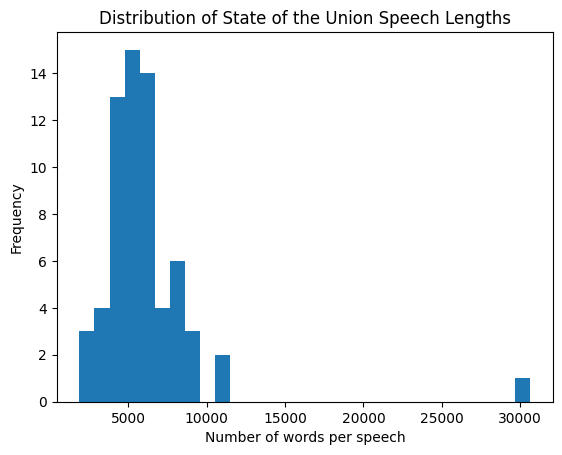

In [30]:
import matplotlib.pyplot as plt

plt.hist(doc_lengths.values(), bins=30)
plt.xlabel("Number of words per speech")
plt.ylabel("Frequency")
plt.title("Distribution of State of the Union Speech Lengths")
plt.show()


In the next section, we will treat each State of the Union address as a document and the full collection as a corpus. We will begin designing preprocessing pipelines using both NLTK and spaCy, and we will compare how each library handles the same steps.